In [1]:
import networkx as nx
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)

## view the top 5,
node_to_degrees[:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

In [4]:
## calculate degree centrality,
eigenvector_centrality = nx.eigenvector_centrality(G)

## set degree centrality metrics on each node,
nx.set_node_attributes(G, eigenvector_centrality, 'ec')

sorted(G.nodes(data=True), key = lambda x: x[1]['ec'], reverse=True)

[(33, {'club': 'Officer', 'ec': 0.373371213013235}),
 (0, {'club': 'Mr. Hi', 'ec': 0.3554834941851943}),
 (2, {'club': 'Mr. Hi', 'ec': 0.31718938996844476}),
 (32, {'club': 'Officer', 'ec': 0.3086510477336959}),
 (1, {'club': 'Mr. Hi', 'ec': 0.2659538704545025}),
 (8, {'club': 'Mr. Hi', 'ec': 0.2274050914716605}),
 (13, {'club': 'Mr. Hi', 'ec': 0.22646969838808148}),
 (3, {'club': 'Mr. Hi', 'ec': 0.2111740783205706}),
 (31, {'club': 'Officer', 'ec': 0.19103626979791702}),
 (30, {'club': 'Officer', 'ec': 0.17476027834493085}),
 (7, {'club': 'Mr. Hi', 'ec': 0.17095511498035434}),
 (23, {'club': 'Officer', 'ec': 0.15012328691726787}),
 (19, {'club': 'Mr. Hi', 'ec': 0.14791134007618667}),
 (29, {'club': 'Officer', 'ec': 0.13496528673866567}),
 (27, {'club': 'Officer', 'ec': 0.13347932684333308}),
 (28, {'club': 'Officer', 'ec': 0.13107925627221215}),
 (9, {'club': 'Officer', 'ec': 0.10267519030637758}),
 (14, {'club': 'Officer', 'ec': 0.10140627846270832}),
 (15, {'club': 'Officer', 'ec': 

(-0.8064379457143837,
 1.0922699296094738,
 -0.7152715631974976,
 0.7277692278648923)

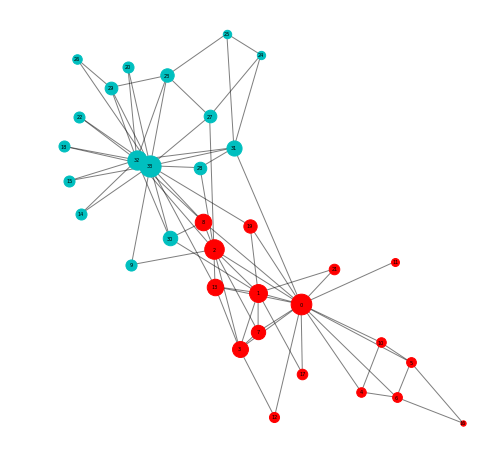

In [5]:
nodes = G.nodes(data = True)

clubs = np.unique([ data['club'] for n, data in nodes ])

plt.figure(figsize=(8, 8))

layout = nx.spring_layout(G)

colors = [ 'r', 'c' ]
for i, club in enumerate(clubs):
    color = colors[i]
    
    nodes_for_club = [ (n, data) for n, data in nodes if data['club'] == club ]
    
    for key, nodes_in_club in itertools.groupby(sorted(nodes_for_club, key=lambda x: x[1]['ec']), key=lambda x: x[1]['ec']):
        nodelist = [ n[0] for n in nodes_in_club ]
        nx.draw_networkx_nodes(
            G,
            layout,
            nodelist=nodelist,
            node_color=color,
            node_size=key*1200)

nx.draw_networkx_labels(G, layout, dict([ (n[0], n[0]) for n in nodes ]), font_size=5)
nx.draw_networkx_edges(G, layout, width=1.0, alpha=0.5)

plt.axis('off')